In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

df = pd.read_csv('/content/drive/MyDrive/ML projects/dataset/ppg_data.csv')

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(data_scaled, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 2))

train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

lr_schedule = ExponentialDecay(
    initial_learning_rate=0.0005,
    decay_steps=10000,
    decay_rate=0.9
)
optimizer = SGD(learning_rate=lr_schedule, momentum=0.9)

model = Sequential([
    LSTM(25, return_sequences=True, input_shape=(seq_length, 2)),
    BatchNormalization(),
    Dropout(0.15),
    LSTM(25, return_sequences=False),
    BatchNormalization(),
    Dropout(0.1),
    Dense(2)
])

model.compile(optimizer=optimizer, loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 10, 25)              │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 10, 25)              │             100 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 10, 25)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 25)                  │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 25)                  │             100 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │              52 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,152 (31.84 KB)

 Trainable params: 8,052 (31.45 KB)

 Non-trainable params: 100 (400.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history=model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

Epoch 1/3
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 121s 15ms/step - loss: 0.0602 - val_loss: 0.0202
Epoch 2/3
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 138s 14ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 3/3
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 140s 14ms/step - loss: 8.6071e-04 - val_loss: 0.0047


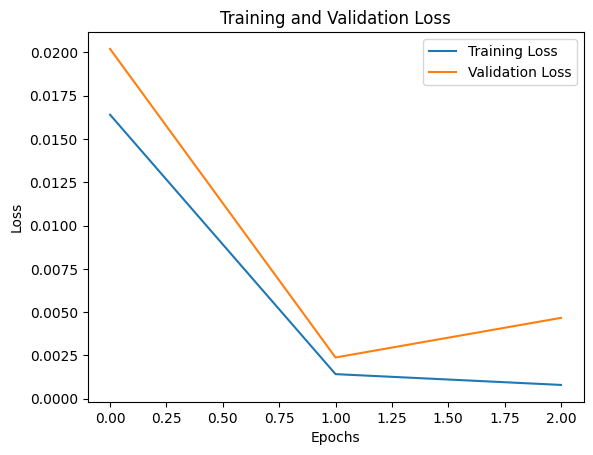

In [ ]:
tf.keras.callbacks.History()
history = model.history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


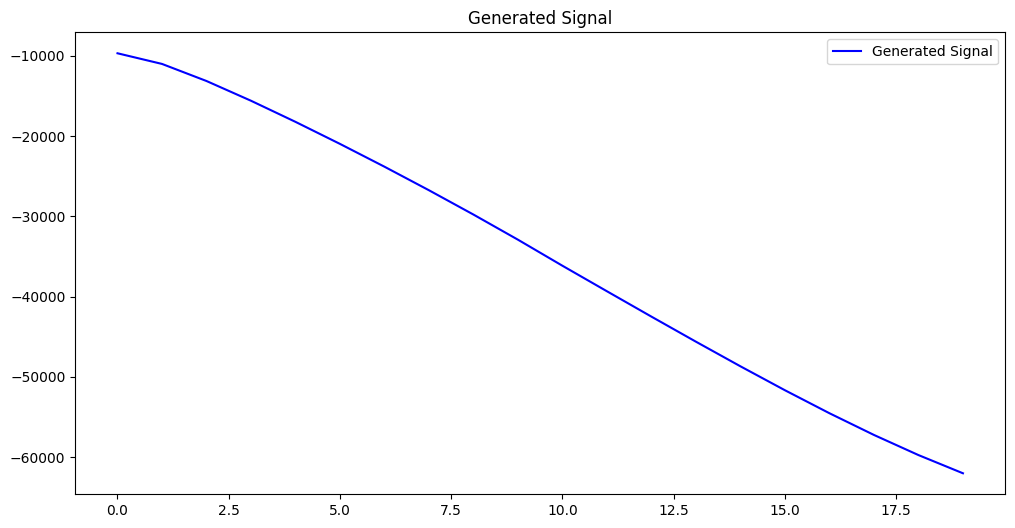

In [ ]:
future_steps = 20
input_sequence = X_test[-1].reshape(1, seq_length, 2)
generated_signal = []

for _ in range(future_steps):
    prediction = model.predict(input_sequence)
    generated_signal.append(prediction[0])
    input_sequence = np.roll(input_sequence, -1, axis=1)
    input_sequence[0, -1, :] = prediction

generated_signal = scaler.inverse_transform(generated_signal)

plt.figure(figsize=(12, 6))
plt.plot(range(future_steps), generated_signal[:, 0], label="Generated Signal", color='blue')
plt.legend()
plt.title("Generated Signal")
plt.show()

In [ ]:
model.save("test.h5")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
Missing Pulse Detected at Indices: [  6   7   8   9  10  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91 110]


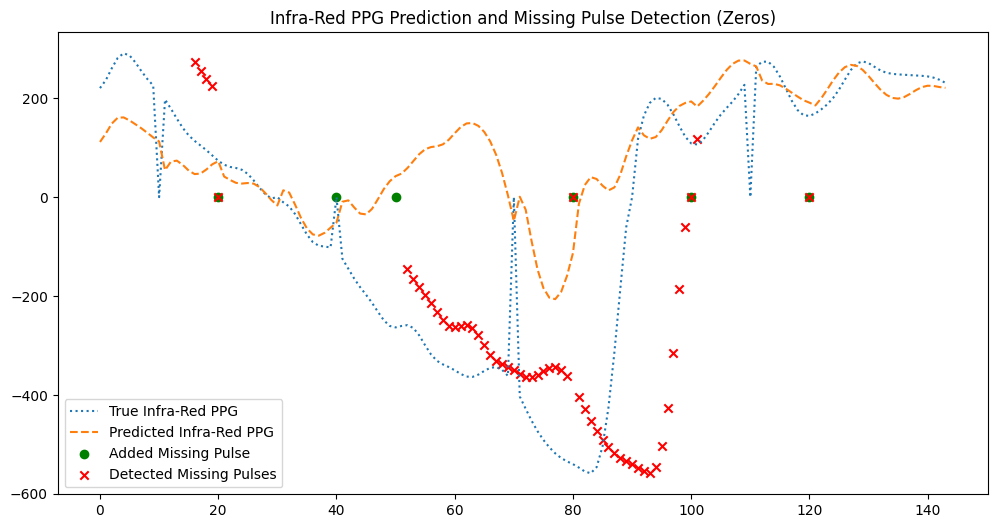

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
import io

# Load the model with custom_objects
model = load_model('test.h5', custom_objects={'mse': MeanSquaredError()})

# Load your data
data = """Infra-Red PPG,Red PPG
231.3,195.6
237.0,202.7
240.4,208.8
243.9,220.6
248.4,239.2
251.6,257.0
249.3,262.0
239.7,246.7
226.4,215.4
217.5,183.0
220.4,166.1
236.8,173.0
260.6,198.4
281.4,228.8
290.8,250.4
286.4,257.1
272.2,250.3
254.7,235.1
238.9,216.8
225.6,199.0
212.6,184.7
197.3,176.1
178.7,173.4
158.6,173.6
139.9,171.6
124.9,163.9
113.7,151.0
104.4,137.0
94.8,125.9
84.0,119.1
73.5,114.8
65.5,111.2
61.1,108.2
58.9,107.3
55.2,108.8
46.9,110.2
33.7,108.0
18.5,100.7
5.5,91.2
-2.6,84.7
-6.6,84.4
-10.5,88.1
-18.9,89.0
-34.3,80.5
-54.9,61.0
-75.7,35.3
-91.0,11.4
-98.3,-4.6
-99.9,-11.6
-101.7,-13.9
-109.3,-18.0
-124.6,-29.3
-144.7,-49.4
-164.8,-76.6
-182.1,-106.4
-197.4,-133.8
-213.6,-154.8
-231.7,-167.2
-248.9,-171.5
-260.4,-170.0
-263.4,-166.6
-260.5,-164.8
-258.8,-167.6
-264.6,-176.2
-279.6,-190.4
-299.7,-207.8
-318.3,-225.2
-331.0,-238.8
-338.2,-245.8
-343.6,-245.7
-350.0,-240.0
-357.4,-231.2
-362.8,-221.8
-363.5,-211.9
-358.8,-200.2
-351.3,-184.6
-345.1,-165.7
-343.7,-147.9
-349.0,-138.8
-361.4,-145.3
-380.0,-169.4
-403.1,-206.0
-428.0,-244.6
-452.0,-274.6
-473.1,-291.4
-490.9,-297.7
-505.8,-301.3
-518.0,-308.8
-527.5,-320.9
-534.3,-332.5
-539.9,-337.2
-546.8,-332.0
-554.7,-319.1
-558.3,-303.4
-545.9,-287.7
-504.1,-269.8
-425.6,-243.9
-314.4,-205.6
-186.0,-156.3
-61.1,-103.3
42.8,-56.4
117.8,-22.3
165.0,-1.7
190.5,9.4
200.5,16.5
198.6,22.4
186.7,26.9
167.0,28.7
143.4,27.8
122.0,26.5
108.5,27.4
106.4,31.6
115.5,37.4
131.9,41.7
150.4,42.7
166.8,41.5
180.4,41.1
193.3,44.6
208.5,52.4
227.0,62.4
246.8,71.2
263.9,76.4
273.8,77.5
273.8,75.9
263.3,73.0
243.9,69.6
219.4,66.3
195.0,63.5
175.8,61.9
165.5,61.8
164.2,62.4
169.2,62.8
177.4,62.5
187.4,62.5
200.4,64.4
217.5,69.8
237.7,78.3
257.0,88.3
270.2,97.2
274.4,103.7
270.9,107.9
263.4,111.0
256.2,114.1
251.5,117.8
249.2,122.0
248.1,126.8
247.4,132.3
246.7,138.5
246.0,144.8
245.2,149.7
244.0,151.4
241.5,149.5
237.2,144.9
231.0,139.8"""

df = pd.read_csv(io.StringIO(data))

missing_indices = [20,40, 50, 80,100, 120]
for index in missing_indices:
    df.loc[index, ['Infra-Red PPG', 'Red PPG']] = 0

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df.values)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(data_scaled, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 2))

y_pred = model.predict(X)
y_pred = scaler.inverse_transform(y_pred)
y = scaler.inverse_transform(y)

def detect_missing_pulses(true_values, predicted_values):
    differences = np.abs(true_values - predicted_values)
    anomalies = np.mean(differences, axis=1) > 100
    return np.where(anomalies)[0]

missing_pulse_indices = detect_missing_pulses(y, y_pred)
print("Missing Pulse Detected at Indices:", missing_pulse_indices)

plt.figure(figsize=(12, 6))
plt.plot(y[:, 0], label="True Infra-Red PPG", linestyle='dotted')
plt.plot(y_pred[:, 0], label="Predicted Infra-Red PPG", linestyle='dashed')

for index in missing_indices:
    if index >= seq_length:
        plt.scatter(index, df['Infra-Red PPG'].values[index], color='green', marker='o', label='Added Missing Pulse' if index == missing_indices[0] else "")

plt.scatter(missing_pulse_indices + seq_length, y[missing_pulse_indices, 0], color='red', label="Detected Missing Pulses", marker='x')

plt.legend()
plt.title("Infra-Red PPG Prediction and Missing Pulse Detection (Zeros)")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict the test data
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Calculate metrics
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


3375/3375 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step
Mean Squared Error (MSE): 1168.3141629009108
Mean Absolute Error (MAE): 28.041382953995722
R² Score: -49.65613509466572


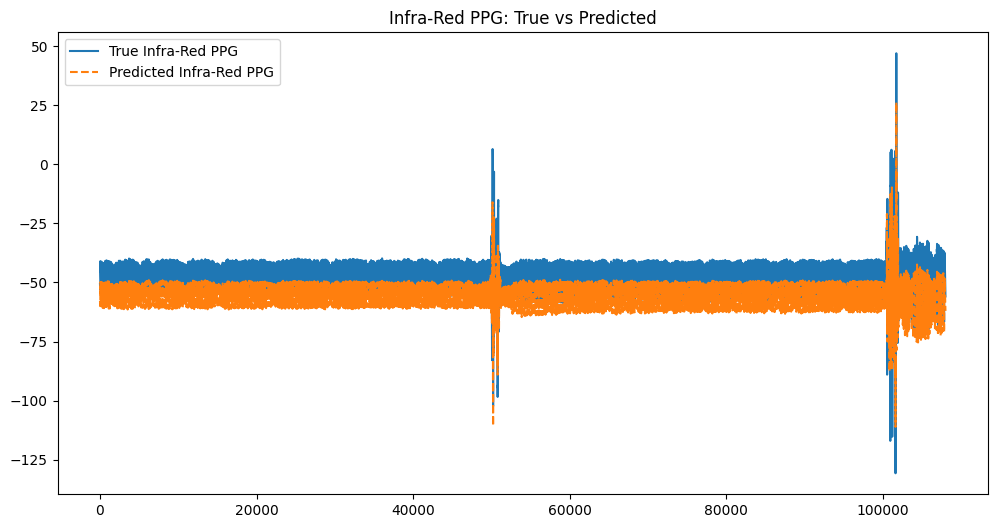

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled[:, 0], label="True Infra-Red PPG", linestyle='solid')
plt.plot(y_pred_rescaled[:, 0], label="Predicted Infra-Red PPG", linestyle='dashed')
plt.legend()
plt.title("Infra-Red PPG: True vs Predicted")
plt.show()
